In [7]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
csv = {"00a": "svm/beta_poison_k30.csv", 
       "00b": "svm-linear/flip.csv",
       
       "01a": "mlp1/beta_poison_k30.csv",
       "01b": "mlp1/flip.csv",
       
       "02a": "mlp2/beta_poison_k30.csv",
       "02b": "mlp2/flip.csv",       
       
       "10a": "logistic/beta_poison_k30.csv", 
       "10b": "logistic/flip.csv", 
       
       "11a": "mlp3/beta_poison_k30.csv",
       "11b": "mlp3/flip.csv",
       
       "12a": "cnn/beta_poison_k30.csv",
       "12b": "cnn/flip.csv",       
      }

In [9]:
legend = {"00a": "Beta k=15", 
          "00b": "Random Flip",

          "01a": "Beta k=15", 
          "01b": "Random Flip",

          "02a": "Beta k=15", 
          "02b": "Random Flip",
          
          "10a": "Beta k=15", 
          "10b": "Random Flip",

          "11a": "Beta k=15", 
          "11b": "Random Flip",

          "12a": "Beta k=15", 
          "12b": "Random Flip",
          }

In [10]:
title = {"00": "SVM C=1", 
    
        "01": "MLP 1 Hidden Layer",
       
        "02": "MLP 2 Hidden Layer",
         
        "10": "Logistic Regression", 
    
        "11": "MLP 3 Hidden Layer",
       
        "12": "CNN",       
        }

In [11]:
BASE_PATH =  "../TPS_experiments/cifar-6-8-tr300/"

In [12]:
sns.set_style("white")

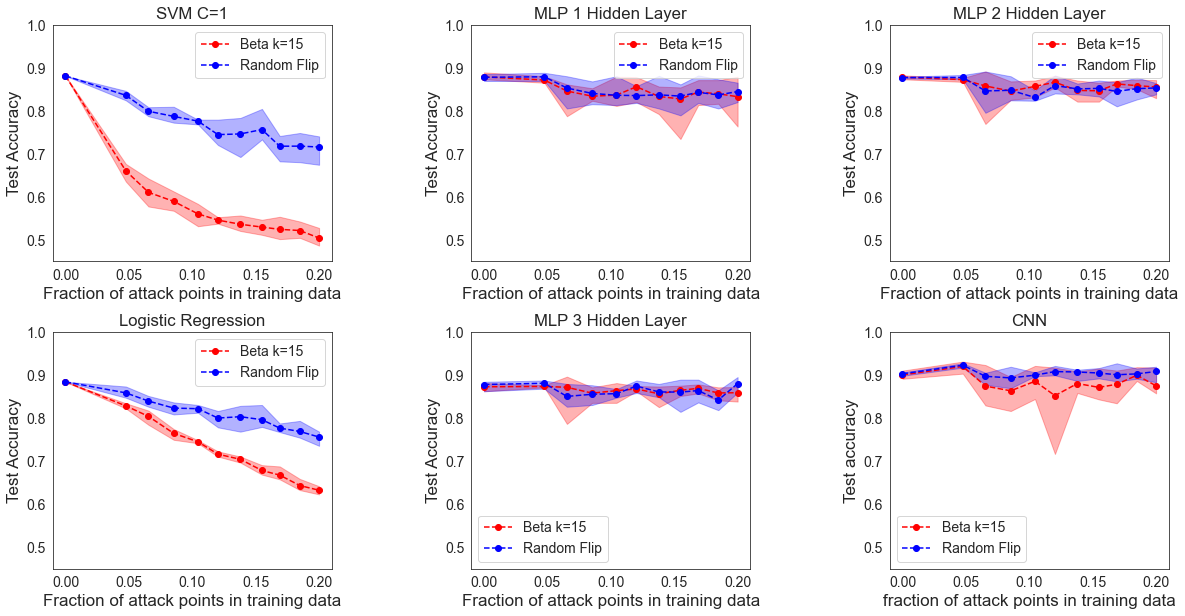

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.subplots_adjust(hspace=0.3, wspace=0.5)

C = 1

for row in range(2):
    for column in range(3):
        plt.rcParams.update({'font.size': 14})

        df_a = pd.read_csv(BASE_PATH + csv[str(row)+str(column) + "a"])
        df_a = df_a.loc[df_a['c '] == C]

        df_b = pd.read_csv(BASE_PATH + csv[str(row)+str(column) + "b"])
        df_b = df_b.loc[df_b['c '] == C]


        beta_agg_a = df_a.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
        beta_agg_a.reset_index(inplace=True)

        beta_agg_b = df_b.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
        beta_agg_b.reset_index(inplace=True)

        beta_agg_a.plot(x='poison_fraction ', y='mean', c='r', 
                        linestyle='--', marker='o', ax=axes[row, column],
                        label=legend[str(row)+str(column) + "a"])

        beta_agg_b.plot(x='poison_fraction ', y='mean', c='b', 
                        linestyle='--', marker='o', ax=axes[row, column],
                        label=legend[str(row)+str(column) + "b"])


        axes[row, column].fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_a, color=(1., 0., 0., 0.3))
        axes[row, column].fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg_b, color=(0., 0., 1., 0.3))

        axes[row, column].set_xlabel("Fraction of attack points in training data", fontsize=17)
        axes[row, column].set_ylabel("Test Accuracy", fontsize=17)
        axes[row, column].set_title(title[str(row)+str(column)])
        plt.setp(axes[row, column], ylim=(0.45,1))
        axes[row, column].xaxis.set_ticks(np.arange(0, 0.21, 0.05))


# for ax in fig.get_axes():
#     ax.label_outer()
plt.xlabel("fraction of attack points in training data")
plt.ylabel('Test accuracy')
plt.savefig("nonlinear_results_cifar10.png")